In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr
import glob

In [2]:
path="/lustre/ytzheng/"
Casename = 'ASTEX_cold2.6'
Casename1 = 'ASTEX_warm2.6'

f = xr.open_mfdataset(path + Casename + '/' +  '*000.nc',
                      combine = 'by_coords',decode_cf = False)

f1 = xr.open_mfdataset(path + Casename1 + '/' + '*000.nc',
                      combine = 'by_coords',decode_cf = False)

f = f.isel(z = slice(0, 400))
f1 = f1.isel(z = slice(0, 400))

In [78]:
z = f['z']/1000.
x = f['x']/1000.
y = f['y']/1000.
myfontsize = 11

In [79]:
# defining a function for axe plotting
def plot_3d_LWC(ax, xx, yy, zz, var, mytitle):
    ax.set_facecolor('black') 
    ax.grid(False) 

    mask = var > 0.1
    ind = np.where(mask)
    x = xx[ind[0]]
    y = yy[ind[1]]
    z = zz[ind[2]]
    c = var[ind]
    
    sax = ax.scatter(x, y, z, c = c,cmap = 'Blues',alpha = 0.8, s = 0.1, marker = "o", vmin=0., vmax=1.4)
    cbar = fig.colorbar(sax, ax = ax)
    cbar.set_label("cloud water (g/kg)", fontsize=myfontsize)

    mask = (var > 0.001) & (var < 0.1)
    ind = np.where(mask)
    x = xx[ind[0]]
    y = yy[ind[1]]
    z = zz[ind[2]]
    c = var[ind]
    ax.scatter(x, y, z, c = 'white',alpha = 0.01, s = 0.1, marker = "o")
    
    ax.set_zlim([0., 2])
    ax.set_xlabel('X (km)')
    ax.set_ylabel('Y (km)')
#     ax.set_zlabel('Z (km)')

    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.zaxis.label.set_color('white')

    ax.tick_params(axis='x',colors='white')
    ax.tick_params(axis='y',colors='white')
    ax.tick_params(axis='z',colors='white')

    ax.set_title(mytitle, fontsize=myfontsize, color='white')

    ax.view_init(15, 60)

In [64]:
QTOT = f['QN'] + f['QV']
QTOT1 = f1['QN'] + f1['QV']

z2D = f['z'].expand_dims(x = f['x'].size).expand_dims(y = f['y'].size)

In [72]:
QTOT_90 = QTOT.load().quantile(0.99, dim = ('z'))[0]
z_QTOT90 = z2D.where(QTOT >= QTOT_90).max(dim = 'z', skipna = 'True').isel(time = 0)

QTOT1_90 = QTOT1.load().quantile(0.99, dim = ('z'))[0]
z1_QTOT90 = z2D.where(QTOT1 >= QTOT1_90).max(dim = 'z', skipna = 'True').isel(time = 0)

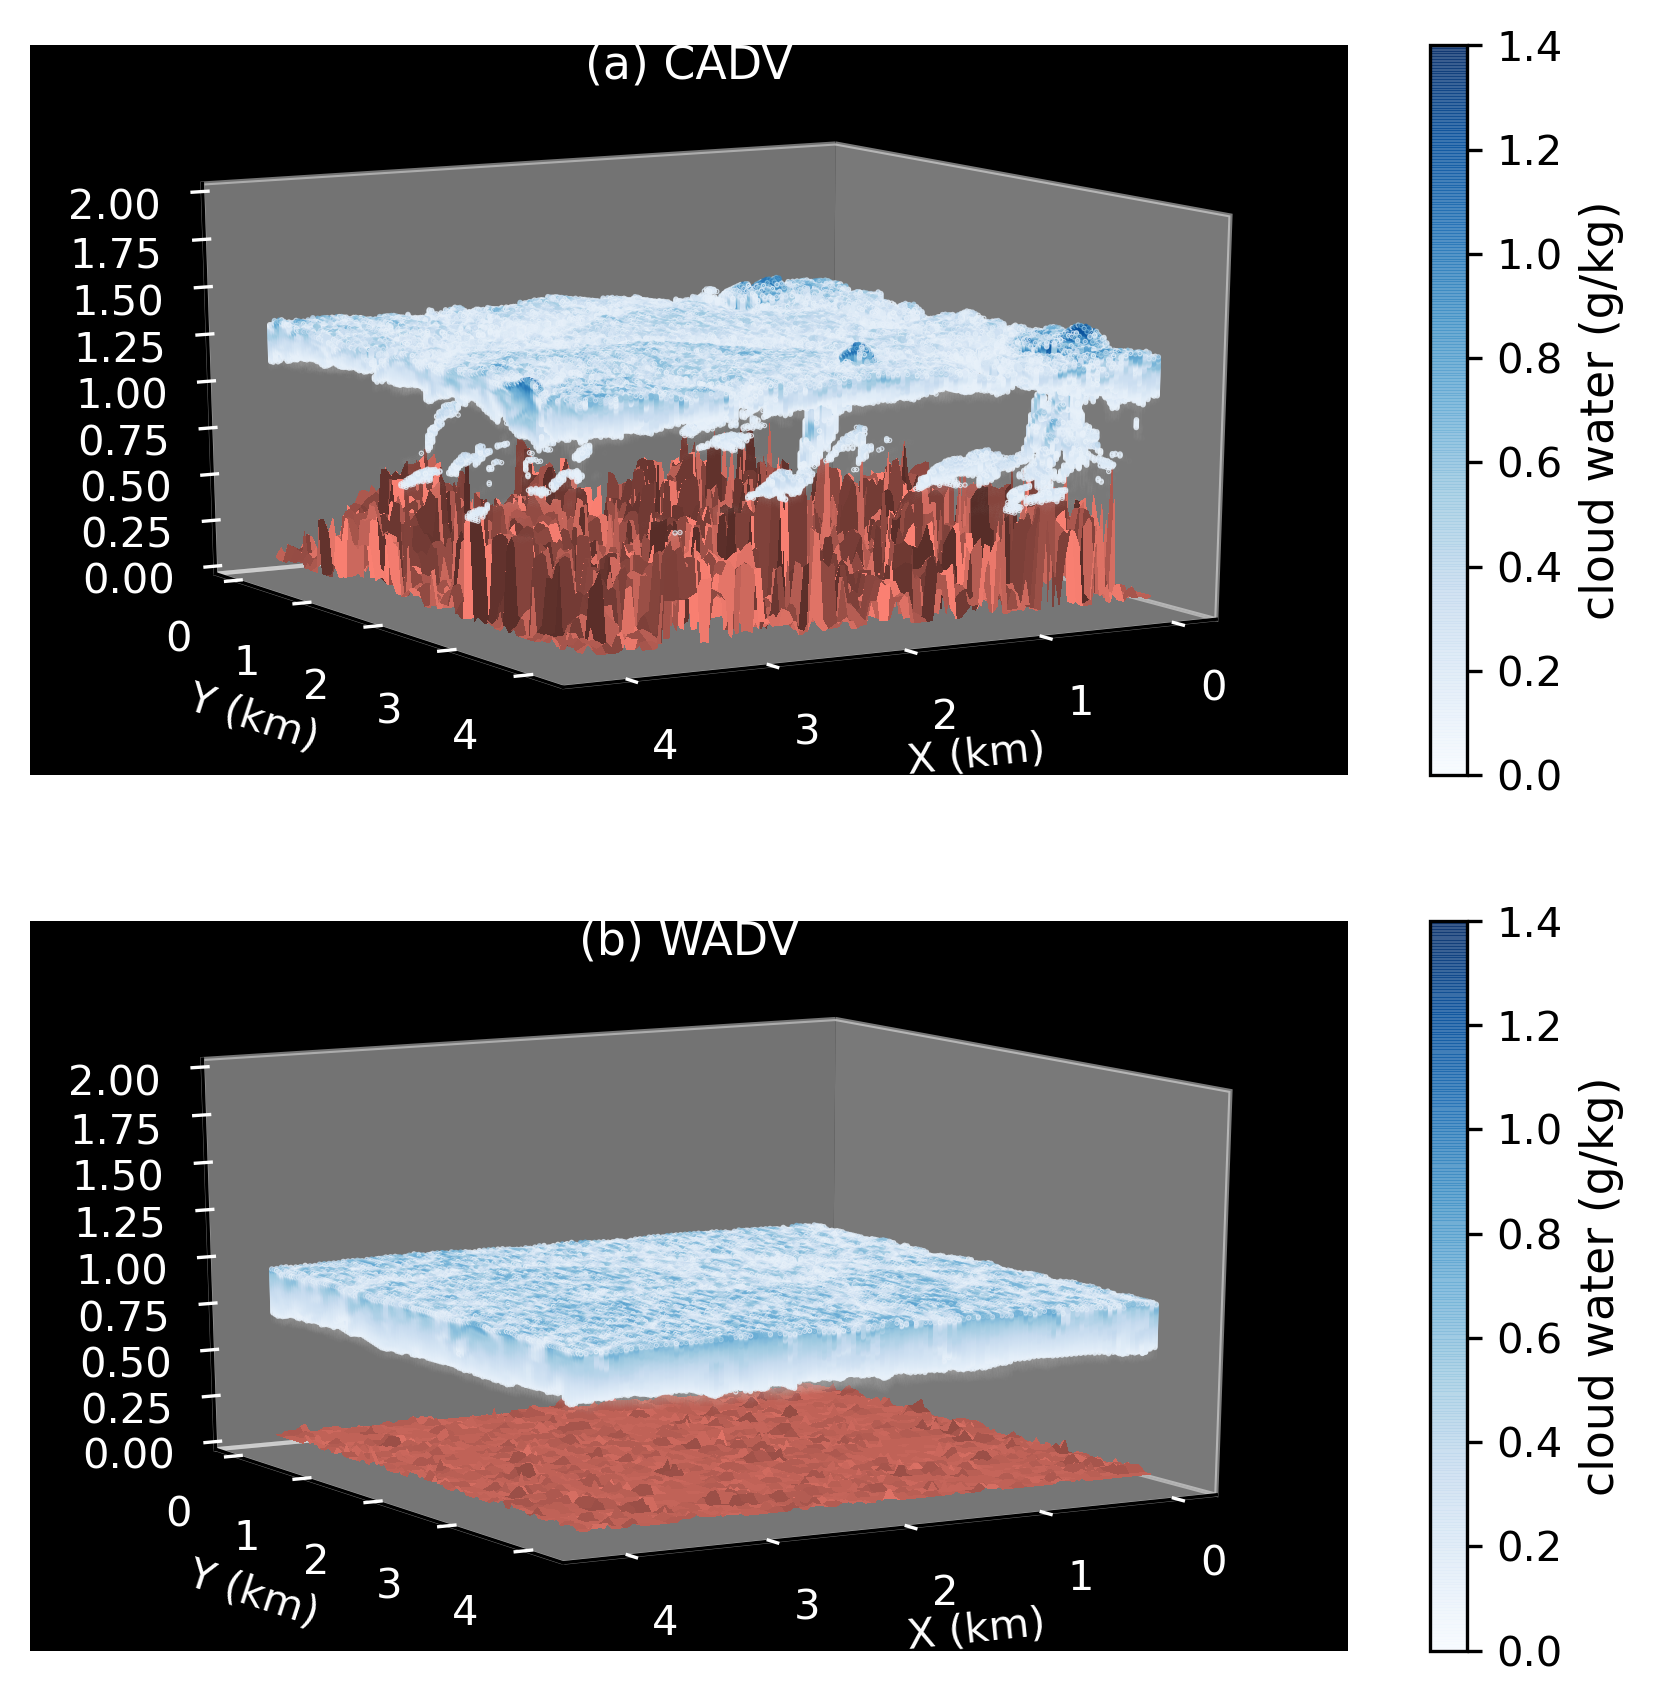

In [80]:
fig=plt.figure(figsize=(18/2.54, 18/2.54), dpi = 300)
fig.tight_layout()

ax = fig.add_subplot(211,projection='3d')
plot_3d_LWC(ax, x, y, z, f['QN'].values[0,:,:,:].T, '(a) CADV')

# Plot the surface.
X, Y = np.meshgrid(x, y)
Z = z_QTOT90/1000.
surf = ax.plot_surface(X, Y, Z, color = 'salmon', 
#                        cmap = 'bwr',
                       linewidth=0, antialiased=False)


ax = fig.add_subplot(212,projection='3d')
plot_3d_LWC(ax, x, y, z, f1['QN'].values[0,:,:,:].T, '(b) WADV')

Z = z1_QTOT90/1000.
surf = ax.plot_surface(X, Y, Z, color = 'salmon', 
#                        cmap = 'bwr',
                       linewidth=0, antialiased=False)

fig.savefig('plot_result_3D_visualization.png', dpi=fig.dpi, bbox_inches='tight')

In [36]:
QTOT = f['QN'] + f['QV']


In [43]:
z2D = f['z'].expand_dims(x = f['x'].size)

In [44]:
z2D = z2D.expand_dims(y = f['y'].size)

In [46]:
QTOT_90 = QTOT.load().quantile(0.9, dim = ('z'))[0]

In [60]:
z_QTOT90 = z2D.where(QTOT >= QTOT_90).max(dim = 'z', skipna = 'True').isel(time = 0)

In [61]:
z_QTOT90

<xarray.DataArray 'z' (y: 120, x: 120)>
array([[582.9, 592.8, 610.3, ..., 617.9, 601.9, 624.8],
       [582.9, 582.9, 582.9, ..., 592.8, 592.8, 610.3],
       [582.9, 582.9, 582.9, ..., 592.8, 601.9, 610.3],
       ...,
       [601.9, 601.9, 617.9, ..., 582.9, 677.5, 677.5],
       [617.9, 601.9, 887.5, ..., 582.9, 582.9, 582.9],
       [624.8, 610.3, 610.3, ..., 582.9, 610.3, 582.9]], dtype=float32)
Coordinates:
  * y         (y) float64 0.0 35.0 70.0 105.0 ... 4.095e+03 4.13e+03 4.165e+03
  * x         (x) float64 0.0 35.0 70.0 105.0 ... 4.095e+03 4.13e+03 4.165e+03
    time      float32 166.25
    quantile  float64 0.9

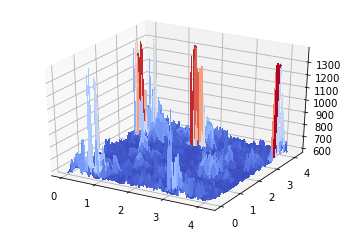

In [63]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X, Y = np.meshgrid(x, y)
Z = z_QTOT90

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


In [30]:
X.shape

(40, 40)

In [29]:
Z.shape

(40, 40)